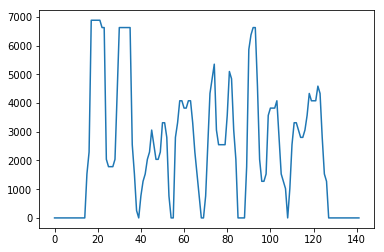

[14, 39, 55, 69, 88, 108]
14
39
55
69
88
108
contoursNum 9
(57, 142)


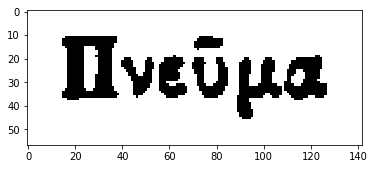

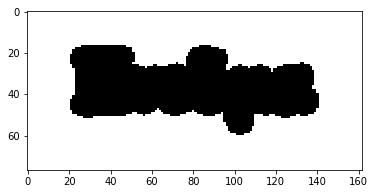

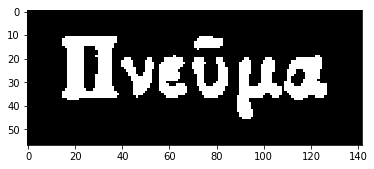

<Figure size 432x288 with 0 Axes>

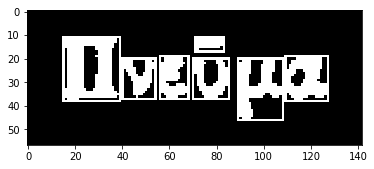

In [40]:
import matplotlib.pyplot as plt 
import numpy as np
import cv2
#from  PgFunctions import *
#img2 = cv2.imread("word/pneuma.png",0);

def createPadding(img, margin):
    w=img.shape[1]
    #print(w)
    for i in range(10):
        img = np.insert(img, w, values=255, axis=1)

    for i in range(10):
        img = np.insert(img, 0, values=255, axis=1)    
    
    h=img.shape[0]
    #print(w)
    for i in range(10):
        img = np.insert(img, h, values=255, axis=0)
    
    for i in range(10):
        img = np.insert(img, 0, values=255, axis=0)
    
    
    return img


def applyCircleErosion(word_img,r):
    word_img=createPadding(word_img, 20) 
    kernel=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(r,r))
    erode_img = cv2.erode(word_img, kernel, iterations=1)
    return erode_img





words=["word/pneuma.png","word/patera.png"]
words=["word/pneuma.png"]
for file in words:
   

    img1 = cv2.imread(file,0);
    img1=createPadding(img1, 20)

    ##########################

    #{
    imgbit1=img1/255
    imgbit1 = cv2.bitwise_not(img1)
    y1=imgbit1.sum(axis=0)
    num=np.size(imgbit1,1)
    b = np.arange(num)
    fig, ax = plt.subplots()
    ax.plot(b,y1)
    plt.show()
    
    index=np.where(y1==0)
    xarr=index[0]
          
    uniq=[]      
    for i in range(len(xarr)):
        #print(i,xarr[i])
        
        if i==len(xarr)-1:
            continue
        
        
        if xarr[i]==xarr[i+1]-1:
            continue
            
        else:
            uniq.append(xarr[i])
    
    
    print(uniq)
    for x in uniq:
        print(x)
        #letter=img1[0:40,40:80]
        #plt.figure()
        #plt.imshow(letter, cmap='gray')
    
    
    
    
    
    
    
    
    
    
    #}

    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    
    #{
    imgQuery1=img1.copy()
    imgQuery1=applyCircleErosion(imgQuery1,9)
    plt.figure()
    plt.imshow(img1, cmap='gray')
    plt.figure()
    plt.imshow(imgQuery1, cmap='gray')
    #}
    
    
    
    plt.figure()
    plt.imshow(imgbit1, cmap='gray')
    _, Contours, _ = cv2.findContours(imgbit1, cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE) 
    plt.figure()
    print("contoursNum",len(Contours))
    
    
    #rgb_img = cv2.cvtColor(img1, cv.CV_GRAY2RGB)
    print(img1.shape)
    for cnt in Contours:
        #print(cnt)
        area = cv2.contourArea(cnt)
        (x, y, w, h) = cv2.boundingRect(cnt)
        #print(area,x,y,w,h)
        imgbit1=cv2.rectangle(imgbit1,(x,y),( x+w, y+h),(255,255,0),1) 
        #plt.imshow(cnt, cmap='gray')
    
    plt.figure()
    plt.imshow(imgbit1, cmap='gray')
        
    
    